# Models Tuning

Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [6]:
%cd ..

/home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


In [7]:
import matplotlib
import matplotlib.pyplot as plt

from utils.data_loader import ACSEmploymentDataset
from utils.model_tuning_utils import *
from configs.config import *

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [8]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [9]:
STATE = DATASET_CONFIG['state']
YEAR = DATASET_CONFIG['year']
DATASET_NAME = f"Folktables_{STATE}_{YEAR}"

## Loading ACSEmployment data

In [11]:
dataset = ACSEmploymentDataset(state=[STATE], year=YEAR, root_dir='data', with_nulls=False)

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (80684, 16)
Baseline X_test shape:  (20171, 16)
X_train_features.columns:  Index(['SEX_2', 'DREM_0', 'SCHL_6', 'RELP_13', 'NATIVITY_2', 'RELP_10',
       'SCHL_18', 'MIL_1', 'RELP_8', 'RELP_17', 'CIT_1', 'SCHL_10', 'MAR_4',
       'CIT_5', 'RELP_14', 'MIG_2', 'ESP_8', 'ESP_1', 'SCHL_23', 'ESP_0',
       'RELP_15', 'MIG_3', 'RELP_12', 'CIT_2', 'MIL_2', 'RELP_4', 'RELP_5',
       'SEX_1', 'SCHL_11', 'RAC1P_6', 'SCHL_4', 'MIL_4', 'SCHL_15', 'DREM_1',
       'SCHL_20', 'ESP_2', 'ANC_4', 'SCHL_24', 'NATIVITY_1', 'RAC1P_7',
       'RAC1P_9', 'RELP_16', 'SCHL_7', 'RAC1P_1', 'SCHL_21', 'RELP_1',
       'RELP_11', 'ESP_7', 'CIT_4', 'SCHL_19', 'RELP_3', 'DEYE_2', 'DREM_2',
       'MAR_1', 'SCHL_16', 'MAR_5', 'ESP_3', 'ESP_5', 'SCHL_13', 'SCHL_2',
       'SCHL_22', 'DEAR_1', 'RAC1P_8', 'RELP_0', 'SCHL_1', 'RELP_9', 'MIL_3',
       'AGEP', 'ESP_6', 'SCHL_12', 'SCHL_8', 'ANC_2', 'SCHL_17', 'SCHL_5',
       'RAC1P_2', 'MIG_1', 'SCHL_14', 'RAC1P_3', 'SCHL_0', 'DEAR_2', 'RELP_

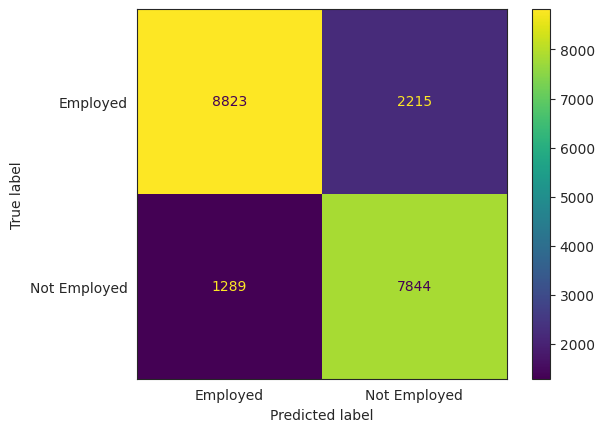

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,Folktables_GA_2018,DecisionTreeClassifier,0.825875,0.826285,"{'criterion': 'gini', 'max_depth': 10, 'max_fe..."


In [12]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [ ]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,Folktables_GA_2018,DecisionTreeClassifier,0.825868,0.826137,"{'criterion': 'entropy', 'max_depth': 10, 'max...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."


In [ ]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: DecisionTreeClassifier
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.6}


In [ ]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('..', 'results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", columns=ML_baseline_results_df.columns, float_format="%.4f")